In [1]:
import torch

In [5]:
x=torch.empty(3,2,3)
print(x)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [8]:
y = torch.rand(100)
print(y)

tensor([0.4426, 0.7409, 0.8603, 0.3879, 0.2431, 0.3335, 0.6146, 0.9796, 0.7555,
        0.0615, 0.3999, 0.7253, 0.7734, 0.9195, 0.5578, 0.4578, 0.8037, 0.8701,
        0.7046, 0.3209, 0.6055, 0.2285, 0.4833, 0.4731, 0.6716, 0.9812, 0.4381,
        0.4777, 0.4990, 0.5341, 0.6605, 0.3511, 0.0128, 0.2608, 0.1229, 0.5036,
        0.0175, 0.6067, 0.4872, 0.4903, 0.8915, 0.0916, 0.3428, 0.9127, 0.7646,
        0.7178, 0.4001, 0.3830, 0.7651, 0.7408, 0.2625, 0.8800, 0.0028, 0.1596,
        0.9785, 0.7382, 0.4191, 0.2321, 0.5644, 0.8294, 0.1983, 0.1974, 0.5303,
        0.1874, 0.6179, 0.0193, 0.8084, 0.8224, 0.6680, 0.2490, 0.1010, 0.7278,
        0.8242, 0.3807, 0.6227, 0.3443, 0.2071, 0.2190, 0.0151, 0.9818, 0.5490,
        0.0306, 0.8704, 0.1221, 0.2002, 0.9497, 0.8802, 0.8014, 0.4796, 0.8999,
        0.9947, 0.1212, 0.2014, 0.3392, 0.7356, 0.5059, 0.6651, 0.5821, 0.7488,
        0.3811])


In [9]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z = torch.add(x,y)
print(y)

tensor([[0.9146, 0.1632],
        [0.7327, 0.5587]])


In [16]:
# elements wise
x = torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,1].item())

tensor([[0.1415, 0.8358, 0.7322],
        [0.3675, 0.7013, 0.9906],
        [0.4377, 0.5748, 0.0595],
        [0.9037, 0.7778, 0.7872],
        [0.4913, 0.4702, 0.9494]])
tensor([0.1415, 0.3675, 0.4377, 0.9037, 0.4913])
0.701259970664978


In [27]:
# reshape the tensor
x= torch.rand(4,4)
print(x)
y=x.view(-1,8)
print(y)

tensor([[0.1329, 0.9868, 0.1906, 0.2309],
        [0.5015, 0.5322, 0.7401, 0.2189],
        [0.0503, 0.2390, 0.2259, 0.9718],
        [0.0233, 0.7201, 0.7528, 0.8210]])
tensor([[0.1329, 0.9868, 0.1906, 0.2309, 0.5015, 0.5322, 0.7401, 0.2189],
        [0.0503, 0.2390, 0.2259, 0.9718, 0.0233, 0.7201, 0.7528, 0.8210]])


In [39]:
# convert torch to numpy
import numpy as np
a  = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))

# remember that the values will share ehch other.
a.add_(1)
print("\nYou can see that torch tensor and numpy are share value each other.\n")
print(a)
print(b)
# If you want the values independent between numpy and torch.
# type the following code
b = a.numpy().copy()

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>

You can see that torch tensor and numpy are share value each other.

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [40]:
# convert numpy to torch
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [45]:
# create tensor and put it into the GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device = device)
    y - torch.ones(5)
    y = y.to(device)
    z = x+y
    z = z.to("cpu")

In [62]:
# Gradian calculation
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y*y*2
# z = z.mean()
print(z)

v = torch.tensor([0.1,0.1,0.001], dtype=torch.float32)
z.backward(v) # dz/dx
print(x.grad)

tensor([0.7145, 0.4294, 1.2373], requires_grad=True)
tensor([2.7145, 2.4294, 3.2373], grad_fn=<AddBackward0>)
tensor([14.7374, 11.8040, 20.9599], grad_fn=<MulBackward0>)
tensor([1.0858, 0.9718, 0.0129])


In [71]:
# preventing gradient history
x=torch.randn(3, requires_grad=True)
print(x)

# x.requires_grad_(False)
# y =  x.detach()
# with torch.no_grad():
#     y=x+2
#     print(y)


tensor([-0.8580, -0.9005, -0.5781], requires_grad=True)
tensor([1.1420, 1.0995, 1.4219])


In [93]:
# example
import torch
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    print(model_output)

    model_output.backward()
    print(weights.grad)

    weights.grad.zero_()
    print(weights)


tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
tensor([1., 1., 1., 1.], requires_grad=True)
tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
tensor([1., 1., 1., 1.], requires_grad=True)
tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
tensor([1., 1., 1., 1.], requires_grad=True)


In [97]:
# backpropagation

x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

y_hat = x * w
loss = (y_hat -y) ** 2
print(loss)

#backward pass
loss.backward()
print(w.grad)
print(w)

# update weights
# next forward and backward pass


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)
tensor(1., requires_grad=True)


In [12]:
# get understand gradian with troch
import torch
X = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True,)

# model prediction
def forward(x):
    return w * x

# loss function with MSE
def loss(y, y_predict):
    return ((y_predict-y)**2).mean()

print(f'Prediction before training: f(5): {forward(5)}')

# Training
lr = 0.01
n_iter = 100

for epoch in range(n_iter):
    # forward
    y_predict = forward(X)

    # loss
    l = loss(y, y_predict)
    l.backward() # dl/dw
    # update weights
    with torch.no_grad():
        w -= lr * w.grad
    w.grad.zero_()

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w= {w:.3f}, loss={l:.3f}')

print(f' prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5): 0.0
epoch 1: w= 0.300, loss=30.000
epoch 3: w= 0.772, loss=15.660
epoch 5: w= 1.113, loss=8.175
epoch 7: w= 1.359, loss=4.267
epoch 9: w= 1.537, loss=2.228
epoch 11: w= 1.665, loss=1.163
epoch 13: w= 1.758, loss=0.607
epoch 15: w= 1.825, loss=0.317
epoch 17: w= 1.874, loss=0.165
epoch 19: w= 1.909, loss=0.086
epoch 21: w= 1.934, loss=0.045
epoch 23: w= 1.952, loss=0.024
epoch 25: w= 1.966, loss=0.012
epoch 27: w= 1.975, loss=0.006
epoch 29: w= 1.982, loss=0.003
epoch 31: w= 1.987, loss=0.002
epoch 33: w= 1.991, loss=0.001
epoch 35: w= 1.993, loss=0.000
epoch 37: w= 1.995, loss=0.000
epoch 39: w= 1.996, loss=0.000
epoch 41: w= 1.997, loss=0.000
epoch 43: w= 1.998, loss=0.000
epoch 45: w= 1.999, loss=0.000
epoch 47: w= 1.999, loss=0.000
epoch 49: w= 1.999, loss=0.000
epoch 51: w= 1.999, loss=0.000
epoch 53: w= 2.000, loss=0.000
epoch 55: w= 2.000, loss=0.000
epoch 57: w= 2.000, loss=0.000
epoch 59: w= 2.000, loss=0.000
epoch 61: w= 2.000, loss=0.000
epoc

In [33]:
# Construct the whole training pipelines
# gradian decent with pythorch
# 1) Design model (input, output, forward)
# 2) Construct loss and optimize
# 3) Training loop
#  - forward pass: compute the prediction
#  - backward pass: gradients
#  - update weights

import torch
import torch.nn as nn

# Design models
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_sample, n_feature = X.shape

input_size = n_feature
output_size = n_feature

# the first to create the linear model
# model = nn.Linear(input_size, output_size)

# create pytorch model
# the second to create the linear model
class LinearRegression(nn.Module):

    def __init__(self,input_dim, output_dim):
        super(LinearRegression,self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

# Training parameters
learning_rate = 0.001
n_iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'Prediction before training: f(5): {model(X_test).item()}')
for epoch in range(n_iters):
    # forward
    y_predict = model(X)

    # loss
    l = loss(y, y_predict)

    # backward
    l.backward()

    # update weights
    optimizer.step()

    #zero gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w= {w[0].item():.3f}, loss={l:.3f}')

print(f' prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5): -0.942479133605957
epoch 1: w= -0.298, loss=32.983
epoch 11: w= -0.011, loss=23.635
epoch 21: w= 0.231, loss=16.960
epoch 31: w= 0.436, loss=12.193
epoch 41: w= 0.610, loss=8.789
epoch 51: w= 0.757, loss=6.358
epoch 61: w= 0.881, loss=4.621
epoch 71: w= 0.986, loss=3.381
epoch 81: w= 1.076, loss=2.495
epoch 91: w= 1.151, loss=1.862
epoch 101: w= 1.215, loss=1.409
epoch 111: w= 1.269, loss=1.086
epoch 121: w= 1.316, loss=0.854
epoch 131: w= 1.355, loss=0.688
epoch 141: w= 1.388, loss=0.569
epoch 151: w= 1.416, loss=0.484
epoch 161: w= 1.440, loss=0.423
epoch 171: w= 1.461, loss=0.378
epoch 181: w= 1.479, loss=0.346
epoch 191: w= 1.494, loss=0.323
epoch 201: w= 1.507, loss=0.306
epoch 211: w= 1.518, loss=0.293
epoch 221: w= 1.527, loss=0.284
epoch 231: w= 1.536, loss=0.276
epoch 241: w= 1.543, loss=0.271
epoch 251: w= 1.549, loss=0.266
epoch 261: w= 1.555, loss=0.263
epoch 271: w= 1.559, loss=0.260
epoch 281: w= 1.564, loss=0.257
epoch 291: w= 1.568, los

torch.Size([100, 1])
epoch0, loss = 9803.3223
epoch10, loss = 9347.5889
epoch20, loss = 8913.9473
epoch30, loss = 8501.3242
epoch40, loss = 8108.7026
epoch50, loss = 7735.1123
epoch60, loss = 7379.6289
epoch70, loss = 7041.3745
epoch80, loss = 6719.5142
epoch90, loss = 6413.2515
epoch100, loss = 6121.8320
epoch110, loss = 5844.5337
epoch120, loss = 5580.6733
epoch130, loss = 5329.5986
epoch140, loss = 5090.6904
epoch150, loss = 4863.3574
epoch160, loss = 4647.0381
epoch170, loss = 4441.2002
epoch180, loss = 4245.3340
epoch190, loss = 4058.9573
epoch200, loss = 3881.6082
epoch210, loss = 3712.8506
epoch220, loss = 3552.2681
epoch230, loss = 3399.4631
epoch240, loss = 3254.0603
epoch250, loss = 3115.6990
epoch260, loss = 2984.0393
epoch270, loss = 2858.7554
epoch280, loss = 2739.5383
epoch290, loss = 2626.0950
epoch300, loss = 2518.1443
epoch310, loss = 2415.4209
epoch320, loss = 2317.6711
epoch330, loss = 2224.6545
epoch340, loss = 2136.1409
epoch350, loss = 2051.9126
epoch360, loss = 1

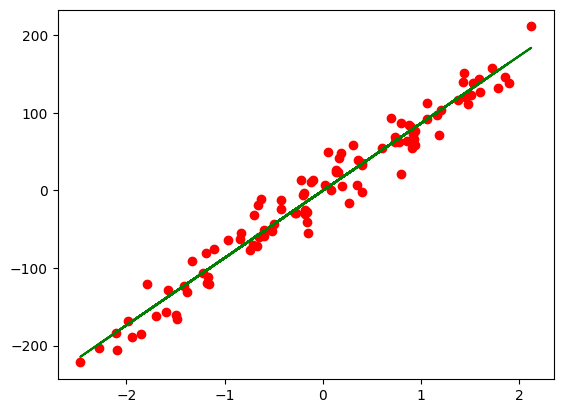

In [16]:
# Construct linear regression
# gradian decent with pythorch
# 1) Design model (input, output, forward)
# 2) Construct loss and optimize
# 3) Training loop
#  - forward pass: compute the prediction
#  - backward pass: gradients
#  - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# prepare the data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state = 69)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_sample, n_feature = X.shape
print(X.shape)

# design the model
input_size = n_feature
output_size = 1
model = nn.Linear(input_size, output_size)

# define the loss and optimizer
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training loop
n_iters = 10000
for epoch in range(n_iters):
    # forward pass
    y_predict = model(X)
    # get loss
    loss = criterion(y_predict,y)
    # backward pass
    loss.backward()

    #update
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 ==0:
        print(f'epoch{epoch}, loss = {loss.item():.4f}')

#plot
predict = model(X).detach().numpy() # detach to define gradient to False
plt.plot(X_numpy, y_numpy, "ro");
plt.plot(X_numpy, predict, "g");

